In [136]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [159]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [160]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

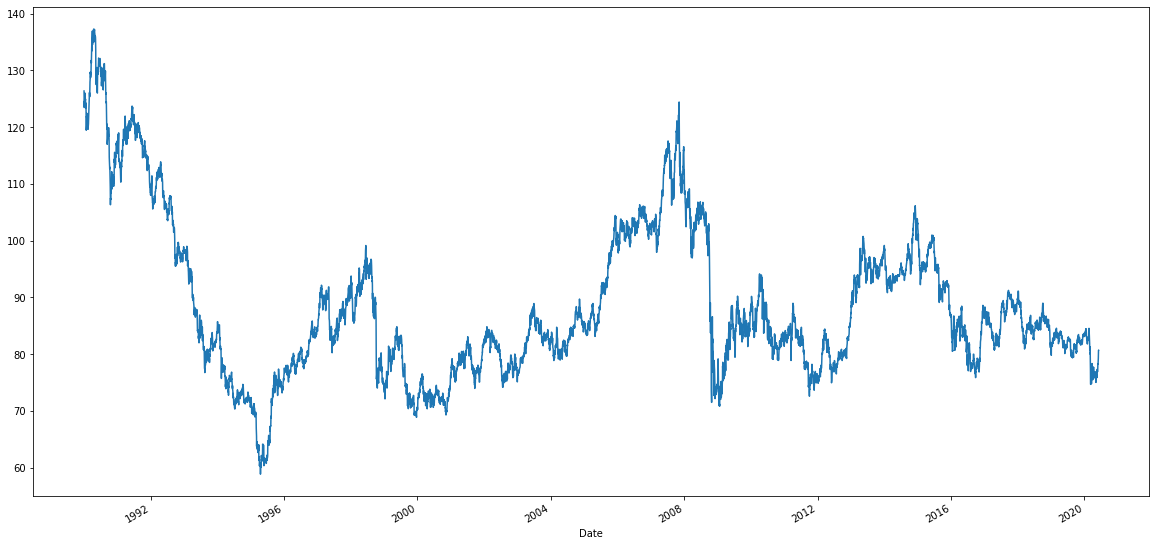

In [161]:
# Plot just the "Price" column from the dataframe:
# YOUR CODE HERE!
cad_jpy_df.Price.plot(figsize=(20,10))

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** OVERALL THE DATA DOESN'T SHOW ANY SPECIFIC PATTERN FOR LONG TERM BUT THERE IS AN UPTREND AND DOWNTREND IF WE CONSIDER SHORT TERM PATTERNTS SPECIALLY BETWEEN 1992-1996 AND 2000-2008

---

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [162]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
# YOUR CODE HERE!
tsa_noise,tsa_trend=sm.tsa.filters.hpfilter(cad_jpy_df['Price'])

In [163]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
cad_jpy_df['noise']=tsa_noise
cad_jpy_df['trend']=tsa_trend


In [164]:
cad_jpy_df.drop(columns=['Open','High','Low'],inplace=True)


In [165]:
cad_jpy_df.head()

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


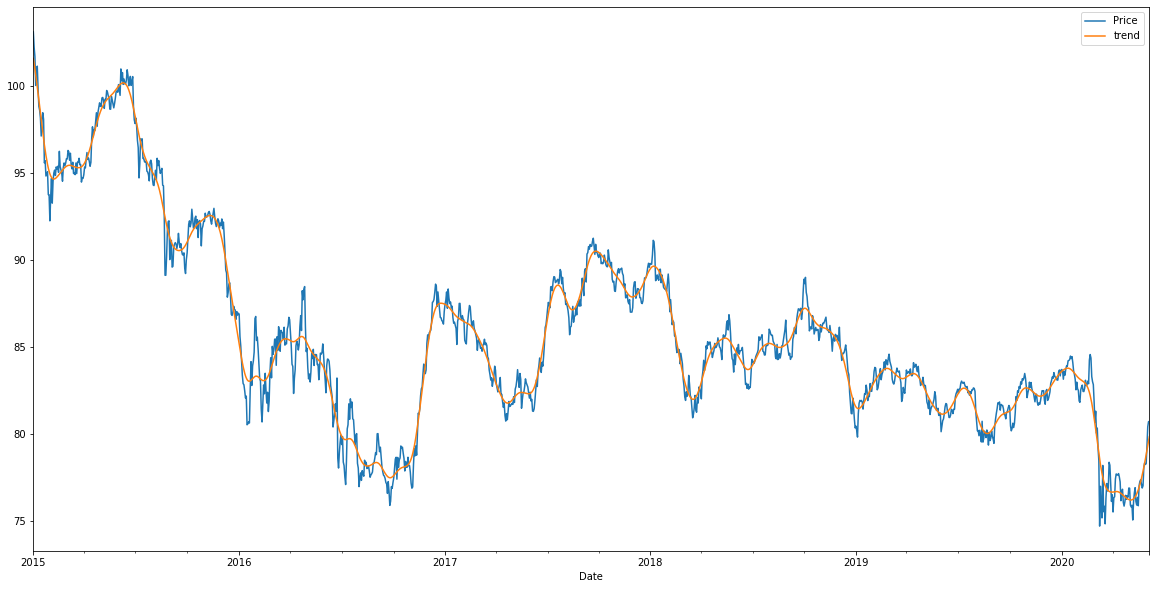

In [166]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
cad_jpy_df[['Price','trend']].loc['2015':].plot(figsize=(20,10))

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** THERE ARE VARIOUS UPTRENDS AND DOWNTRENDS FOR SHORT TERM AND ALSO THERE SEEMS TO BE A DOWNTREND OVERALL

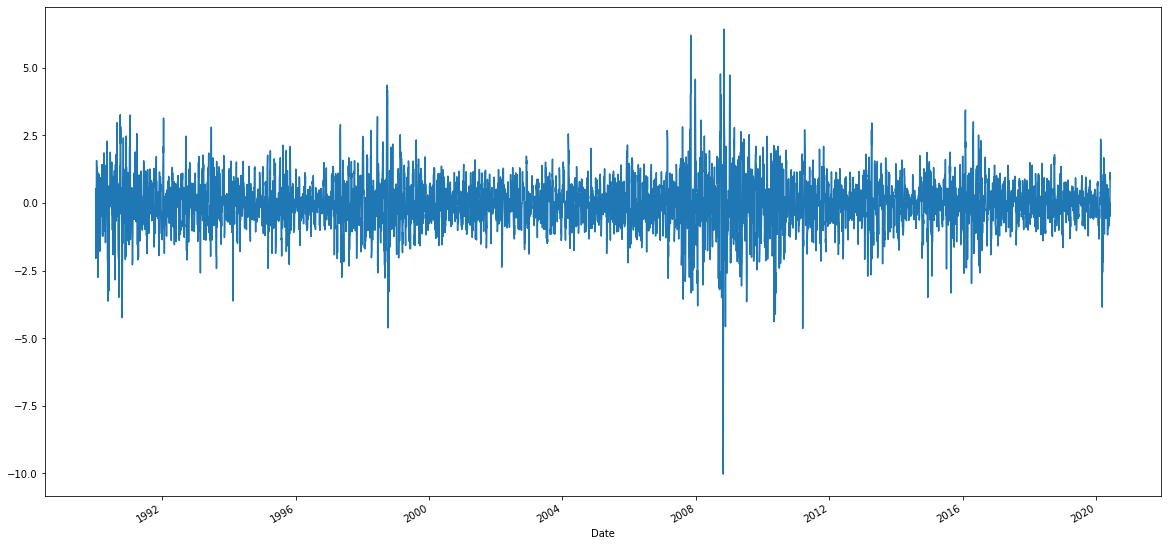

In [167]:
# Plot the Settle Noise
# YOUR CODE HERE!
cad_jpy_df.noise.plot(figsize=(20,10))

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [168]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
from statsmodels.tsa.arima_model import ARMA
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [170]:
import statsmodels.api as sm

# Estimate and ARMA model using statsmodels (use order=(2, 1))
# YOUR CODE HERE!
model=ARMA(returns ,order=(2,1))
results=model.fit()
# Fit the model and assign it to a variable called results
# YOUR CODE HERE!


In [171]:
# Output model summary results:
# YOUR CODE HERE!
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Thu, 22 Jul 2021   AIC                          19513.955
Time:                        20:04:54   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.Price    -0.8547      0.164     -5.200      0.000      -1.177      -0.533
ar.L2.Price    -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.Price     0.8246      0.164      5.030      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1701           +0.0000j           42.1701            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

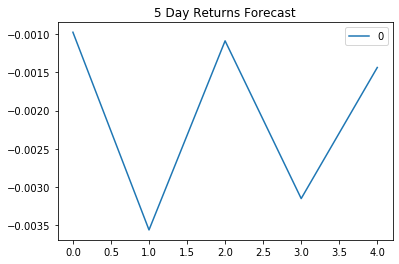

In [172]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!
pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Day Returns Forecast")

**Question:** Based on the p-value, is the model a good fit?

**Answer:** THE MODEL DOESN'T SEEM TO BE A GOOD FIT SINCE THE SECOND AR LAG COEFFICIENT IS GREATE THAN THE 5% CONFIDENCE LEVEL

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [173]:
from statsmodels.tsa.arima_model import ARIMA

# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
model_arima=ARIMA(cad_jpy_df.Price,order=(5,1,1))
results_arima=model_arima.fit()
# Fit the model
# YOUR CODE HERE!


In [174]:
# Output model summary results:
# YOUR CODE HERE!
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Price   No. Observations:                 7928
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -8745.622
Method:                       css-mle   S.D. of innovations              0.729
Date:                Thu, 22 Jul 2021   AIC                          17507.244
Time:                        20:06:36   BIC                          17563.070
Sample:                             1   HQIC                         17526.361
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0058      0.008     -0.743      0.458      -0.021       0.009
ar.L1.D.Price     0.4287      0.246      1.740      0.082      -0.054       0.912
ar.L2.D.Price     0.0177      0.014      1.264      0.206      -0.010       0.045
ar.L3.D.Price    -0.0118      0.012     -0.959      0.337      -0.036       0.012
ar.L4.D.Price     0.0110      0.012      0.879      0.379      -0.013       0.035
ar.L5.D.Price    -0.0191      0.011     -1.702      0.089      -0.041       0.003
ma.L1.D.Price    -0.4568      0.246     -1.856      0.064      -0.939       0.026
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7660           -0.7702j            1.9266           -0.0655
AR.2            1.7660           +0.7702j            1.9266            0.0655
AR.3           -2.3649           -0.0000j            2.3649           -0.5000
AR.4           -0.2974           -2.4212j            2.4394           -0.2695
AR.5           -0.2974           +2.4212j            2.4394            0.2695
MA.1            2.1892           +0.0000j            2.1892            0.0000
-----------------------------------------------------------------------------
"""

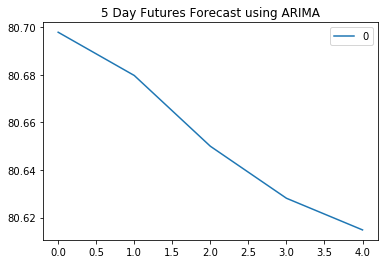

In [176]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
pd.DataFrame(results_arima.forecast(steps=5)[0]).plot(title="5 Day Futures Forecast using ARIMA")

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** THE MODEL SHOWS THAT THE JAPANESE YEN WILL GO TO A DOWNTREND IN THE NEXT 5 DAYS BUT WE CANNOT RELY ON THIS MODEL SINCE THE P VALUES ARE GREATER THAN 5% AND 10% CONFIDENCE INTERVAL

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [177]:
# Estimate a GARCH model:
from arch import arch_model
# YOUR CODE HERE!
model_garch=arch_model(returns,mean='zero',vol='GARCH',p=2,q=1)

# Fit the model
# YOUR CODE HERE!
results_garch=model_garch.fit(disp='off')

In [178]:
# Summarize the model results
# YOUR CODE HERE!
results_garch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8911.02
Distribution:                  Normal   AIC:                           17830.0
Method:            Maximum Likelihood   BIC:                           17858.0
                                        No. Observations:                 7928
Date:                Thu, Jul 22 2021   Df Residuals:                     7928
Time:                        20:08:53   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      9.0733e-03  2.545e-03      3.566  3.628e-04  [4.086e-03,1.406e-02]
alpha[1]       0.0624  1.835e-02      3.402  6.682e-04  [2.647e-02,9.841e-02]
alpha[2]       0.0000  2.010e-02      0.000      1.000 [-3.940e-02,3.940e-02]
beta[1]        0.9243  1.229e-02     75.205      0.000      [  0.900,  0.948]
=============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [179]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [180]:
# Create a 5 day forecast of volatility
forecast_horizon = 5
forecasts=results_garch.forecast(start=last_day, horizon=forecast_horizon)

# Start the forecast using the last_day calculated above
# YOUR CODE HERE!

In [181]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.566035,12.573725,12.581308,12.588786,12.596161


In [182]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.566035
h.2,12.573725
h.3,12.581308
h.4,12.588786
h.5,12.596161


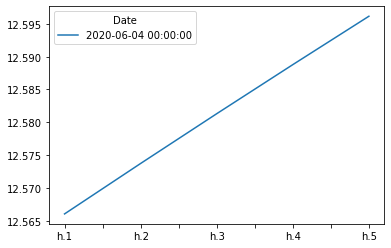

In [183]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot()

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** THE MODEL FORECAST THAT THE VOLATILITY WILL BE LINEARLY INCREASING IN THE COMING DAYS

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    * NOT REALLY SINCE THE PREDICTIONS SHOW A DOWNTREND IN THE NEAR FUTURE, I WOULD PREFER RUNNING OTHER MODELS WITH DIFFERENT AR AND MA COMPONENT IN ORDER TO HAVE A MORE ACCURATE PREDICTIONS

2. Is the risk of the yen expected to increase or decrease?
    * AS PER THE MODEL THE RISK SEEMS TO BE LINEARLY INCREASING IN THE NEAR FUTURE

3. Based on the model evaluation, would you feel confident in using these models for trading?
    * IT DEPENDS ON THE TYPE OF MODEL WE ARE CHOSING, IF THE AIC AND BIC VALUES ARE LOW WITH P VALUES LESS THAN 5% CONFIDENCE , ITS BETTER TO FORECAST THE RESULT AND OBSERVE IT ON THE DAILY BASIS. IF THE MODEL MAKES A CORRECT PREDICTION WITH A MINOR RESIDUAL I WOULD SUGGEST USING THE MODEL FOR TRADING ON THE BASIS OF THE DAILY RETURNS.